Links for 1000 most common words (last accessed 14-MAY-2024):

english: https://www.ef.edu/english-resources/english-vocabulary/top-1000-words/    (last accessed 14-MAY-2024)

spanish: https://strommeninc.com/1000-most-common-spanish-words-frequency-vocabulary/   (last accessed 14-MAY-2024)

russian: http://masterrussian.com/vocabulary/most_common_words.htm  (last accessed 15-MAY-2024)


In [1]:
# Imports
from methods import *
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import os
import string
import pylab as plot
from matplotlib_venn import venn3
import numpy as np

# Initialize paths
languagesDir = r'data\languages'
sampleDir = r'data\samplesDocs'


In [2]:
# Reads the data of the 1000 most common words in the given languages from the data/languages folder
# Here the language is KNOWN
langDict = readData(languagesDir)

# Tokenizes every word based on the language
tokDict  = tokenize(langDict)

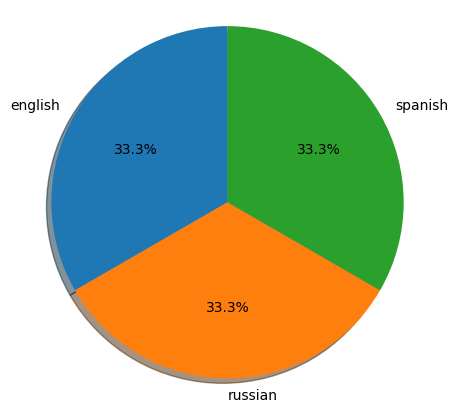

In [3]:
# Displays the samples for each different language as a percentage of a pie chart
fig = plt.figure(figsize=(5, 5))

# labels for the keys of our language dict
labels = langDict.keys()

# Sizes of slice
sizes =  []
for i in list(langDict.values()):
    sizes.append(len(i))

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.show()

It is important to note that english and spanish share some very similar word structures. Specifically, words like 'a' apply to both languages but mean different things. This could create and unwanted bias as 'a' may appear more frequently in english than spanish, and so it is not evaluated equivalently.

For now, we will ignore this bias

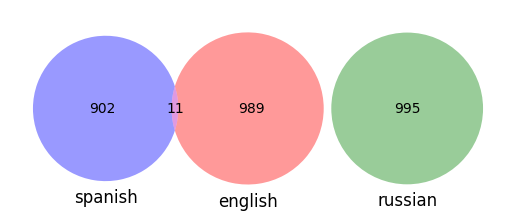

In [4]:
'''
Quick Diagram to show that spanish and english do indeed overlap, while russian does not overlap
with the others. This is expected as Russian uses an entirely different alphabet.
It is also noteworthy that while converting our list of words to sets, we seem to lose some of the words
from Russian and especially Spanish. The original datasets will need to be updated and expanded when we
actually go to train a model.
'''

set1 = set(langDict.get('english'))
set2 = set(langDict.get('russian'))
set3 = set(langDict.get('spanish'))

venn3([set1, set2, set3], ('english', 'russian', 'spanish'))

plt.show()

In [5]:
# Create a new dictionary
langScores = {}

# for every document we have in a given directory, get the vectorized language scores of the document
# and add it to the dictionary as a value with the respective key being the name of the file
# Here the language is NOT KNOWN
for file in os.listdir(sampleDir):
    filePath = sampleDir + '/' + file

    content = readRawText(filePath)+'\n'
    freqs = freqsCalculator(content, tokDict)
    languageScore = langScore(content, freqs)
    langScores[file] = np.array(list(languageScore.values()))

# Build the matrix and get the labels of the respective points (in this case, the labels are just the file names)
matrix, labels = matrixBuilder(langScores)

# Project the matrix onto 2D and 3D space 
proj_matrix_3D = project_to_3d(matrix)
proj_matrix_2D = project_to_2d(matrix)

# Plot the projections
plot_3d_projection(proj_matrix_3D,labels)
plot_2d_projection(proj_matrix_3D,labels)